<p style="text-align:center">
    <a href="https://www.linkedin.com/company/mt-learners/?viewAsMember=true" target="_blank">
    <img src="https://github.com/Mr-MeerMoazzam/Mr-MeerMoazzam/blob/main/Untitled-2.jpg?raw=true" width="150" alt="MT Learners"  />
    </a>
</p>

### Feature Scaling
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# LOADING THE DATA 
df=pd.read_csv("D:\csv files\Social_Network_Ads.csv")
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [3]:
df=df.iloc[:,2:]
df.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

### SPLITTING THE DATA

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis='columns'),df.Purchased,test_size=0.3,random_state=0)

### normalizing

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_trained_scaler=scaler.transform(x_train)
x_test_scaler=scaler.transform(x_test)

In [6]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

## convert numpy array to DataFrame

In [7]:
x_trained_scaler=pd.DataFrame(x_trained_scaler,columns=x_train.columns)
x_test_scaler=pd.DataFrame(x_test_scaler,columns=x_test.columns)
np.round(x_trained_scaler.describe(),1)

Age  EstimatedSalary
count  280.0            280.0
mean     0.0              0.0
std      1.0              1.0
min     -1.9             -1.6
25%     -0.8             -0.8
50%     -0.1              0.0
75%      0.8              0.5
max      2.2              2.3

In [8]:
x_trained_scaler.tail()

Age  EstimatedSalary
275  0.993704        -1.151185
276 -0.869053        -0.775237
277 -0.182774        -0.514966
278 -1.065133        -0.457127
279 -1.163172         1.393691

### Effects before and after the scaling

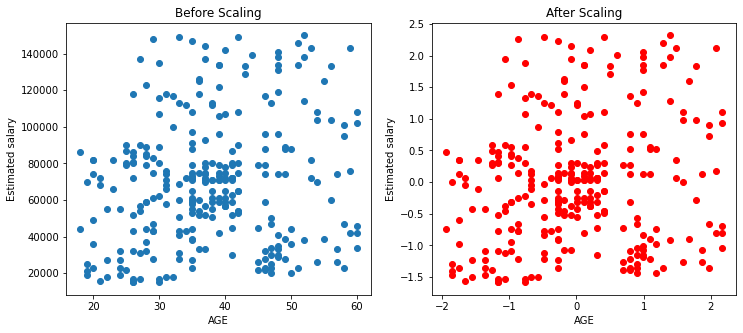

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax1.set_xlabel("AGE")
ax1.set_ylabel("Estimated salary")
ax2.scatter(x_trained_scaler['Age'], x_trained_scaler['EstimatedSalary'],color='red')
ax2.set_xlabel("AGE")
ax2.set_ylabel("Estimated salary")
ax2.set_title("After Scaling")
plt.show()

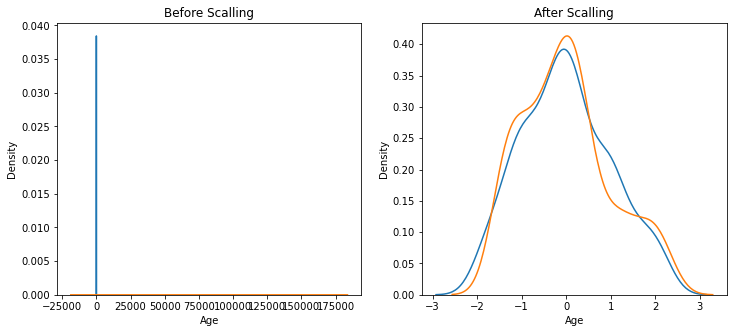

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#Before scalling
ax1.set_title('Before Scalling')

sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

#After scalling
ax2.set_title('After Scalling')

sns.kdeplot(x_trained_scaler['Age'],ax=ax2)
sns.kdeplot(x_trained_scaler['EstimatedSalary'],ax=ax2)
plt.show()

### Individual Effects

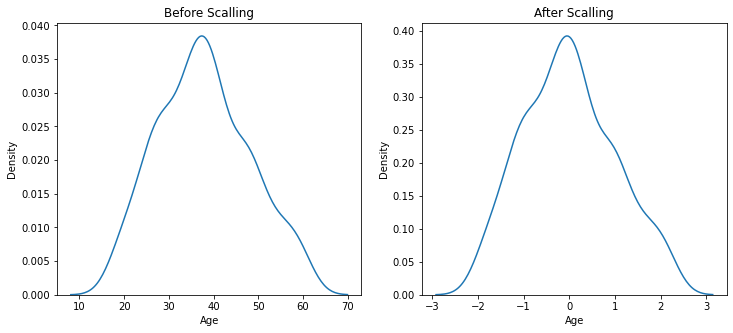

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#Before scalling
ax1.set_title('Before Scalling')
sns.kdeplot(x_train['Age'],ax=ax1)


#After scalling
ax2.set_title('After Scalling')
sns.kdeplot(x_trained_scaler['Age'],ax=ax2)

plt.show()

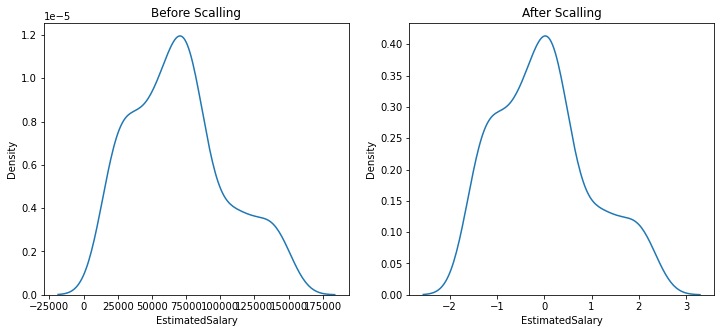

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#Before scalling
ax1.set_title('Before Scalling')

sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

#After scalling
ax2.set_title('After Scalling')

sns.kdeplot(x_trained_scaler['EstimatedSalary'],ax=ax2)
plt.show()

### fitting logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()
Lr_scaled=LogisticRegression()

In [14]:
Lr.fit(x_train,y_train)
Lr_scaled.fit(x_trained_scaler,y_train)

LogisticRegression()

In [15]:
y_pred=Lr.predict(x_test)
y_pred_scaled=Lr_scaled.predict(x_test_scaler)


In [16]:
from sklearn.metrics import accuracy_score
print('Actual : ',accuracy_score(y_test,y_pred))
print('Scalled : ',accuracy_score(y_test,y_pred_scaled))

Actual :  0.6583333333333333
Scalled :  0.8666666666666667


### Scaling create no difference in some algorithms

In [17]:

from sklearn.tree import DecisionTreeClassifier


In [18]:
Dt=DecisionTreeClassifier()
Dt_scaled=DecisionTreeClassifier()

In [19]:
Dt.fit(x_train,y_train)
Dt_scaled.fit(x_trained_scaler,y_train)

DecisionTreeClassifier()

In [20]:
y_pred=Dt.predict(x_test)
y_pred_scaled=Dt_scaled.predict(x_test_scaler)

In [21]:
from sklearn.metrics import accuracy_score
print('Actual : ',accuracy_score(y_test,y_pred))
print('Scalled : ',accuracy_score(y_test,y_pred_scaled))

Actual :  0.875
Scalled :  0.8666666666666667


## Thank you
## Author

<a href="https://www.linkedin.com/in/muhammad-bilal-afzal-95b33323b/">Muhammad Bilal </a>

<div data-mime-type="text/markdown" class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput">
<hr>

<h2></h2><h3 align="center"> Â© <a href="https://www.linkedin.com/company/mt-learners/">Mt Learners</a> 2022. All rights reserved. </h3><h3></h3>

</div>